<a href="https://colab.research.google.com/github/FernandoMV1/DS1--Python/blob/main/Machine_Learning_Linear_Regresssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/Real estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
data_sample = data.corr()

Feature Selection for Regression Model

In [ ]:
data_test = data.iloc[:,3]
data_test.head()

0     84.87882
1    306.59470
2    561.98450
3    561.98450
4    390.56840
Name: X3 distance to the nearest MRT station, dtype: float64

In [ ]:
data_index = data.iloc[:,[3,7]]
data_index.head()

,X3 distance to the nearest MRT station,Y house price of unit area
0,84.87882,37.9
1,306.59470,42.2
2,561.98450,47.3
3,561.98450,54.8
4,390.56840,43.1


In [ ]:
data_name = data.loc[:,["X3 distance to the nearest MRT station","Y house price of unit area"]]
data_name.head()

,X3 distance to the nearest MRT station,Y house price of unit area
0,84.87882,37.9
1,306.59470,42.2
2,561.98450,47.3
3,561.98450,54.8
4,390.56840,43.1


In [ ]:
data = data.loc[:,["X3 distance to the nearest MRT station","Y house price of unit area"]]
data.head()

,X3 distance to the nearest MRT station,Y house price of unit area
0,84.87882,37.9
1,306.59470,42.2
2,561.98450,47.3
3,561.98450,54.8
4,390.56840,43.1


plot

<function matplotlib.pyplot.show(close=None, block=None)>

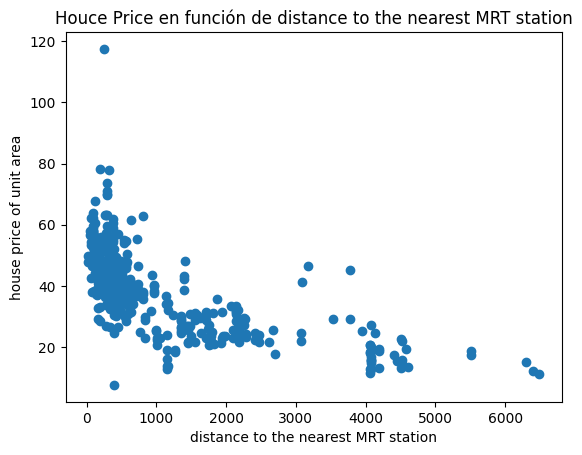

In [ ]:
plt.scatter(data["X3 distance to the nearest MRT station"], data["Y house price of unit area"])
plt.title('Houce Price en función de distance to the nearest MRT station')
plt.xlabel('distance to the nearest MRT station')
plt.ylabel('house price of unit area')
plt.show

#Test Train Split


In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imp.fit(data)
data.iloc[:,:] = imputer.transform(data)
data


,X3 distance to the nearest MRT station,Y house price of unit area
0,84.87882,37.9
1,306.59470,42.2
2,561.98450,47.3
3,561.98450,54.8
4,390.56840,43.1
...,...,...
409,4082.01500,15.4
410,90.45606,50.0
411,390.96960,40.6
412,104.81010,52.5


In [ ]:
X = data["X3 distance to the nearest MRT station"].values.reshape(-1, 1)
y = data["Y house price of unit area"]




In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X,y)

In [ ]:
print(X_train)

[[ 272.6783 ]
 [  23.38284]
 [1157.988  ]
 [ 390.5684 ]
 [2175.03   ]
 [2180.245  ]
 [ 132.5469 ]
 [2147.376  ]
 [4082.015  ]
 [1801.544  ]
 [ 492.2313 ]
 [ 104.8101 ]
 [2707.392  ]
 [ 461.1016 ]
 [ 995.7554 ]
 [5512.038  ]
 [ 193.5845 ]
 [ 512.7871 ]
 [1013.341  ]
 [ 964.7496 ]
 [ 815.9314 ]
 [ 640.7391 ]
 [ 512.5487 ]
 [ 193.5845 ]
 [ 492.2313 ]
 [ 600.8604 ]
 [ 769.4034 ]
 [ 330.0854 ]
 [ 918.6357 ]
 [2147.376  ]
 [1978.671  ]
 [ 472.1745 ]
 [ 335.5273 ]
 [2185.128  ]
 [ 424.5442 ]
 [ 561.9845 ]
 [ 372.1386 ]
 [ 170.1289 ]
 [ 383.2805 ]
 [1402.016  ]
 [ 837.7233 ]
 [ 189.5181 ]
 [ 306.5947 ]
 [ 373.3937 ]
 [1406.43   ]
 [ 258.186  ]
 [1487.868  ]
 [ 732.8528 ]
 [  90.45606]
 [ 379.5575 ]
 [ 289.3248 ]
 [ 421.479  ]
 [1643.499  ]
 [ 329.9747 ]
 [1156.412  ]
 [ 732.8528 ]
 [2147.376  ]
 [4082.015  ]
 [2408.993  ]
 [  87.30222]
 [ 488.8193 ]
 [ 292.9978 ]
 [ 640.6071 ]
 [2288.011  ]
 [1935.009  ]
 [ 750.0704 ]
 [ 533.4762 ]
 [ 123.7429 ]
 [ 737.9161 ]
 [2408.993  ]
 [ 252.5822 ]
 [ 157

#Training Model

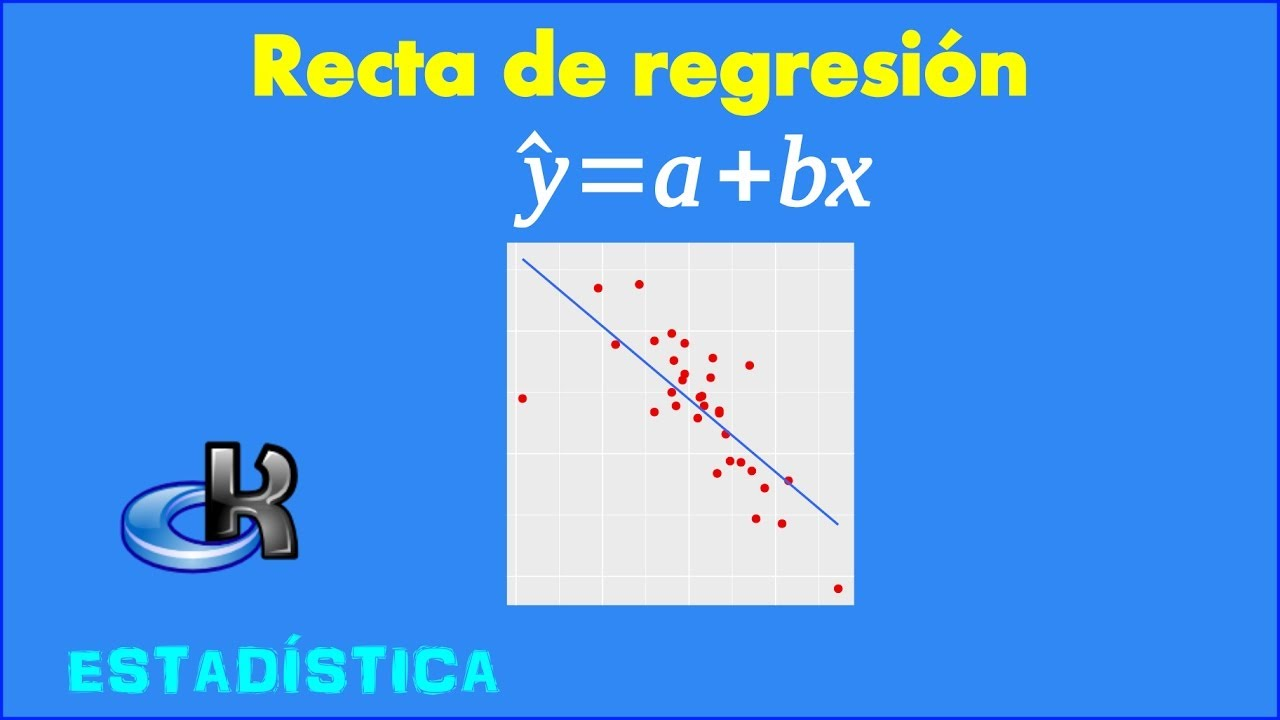

In [ ]:
reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

coeficientes = reg.coef_
intercepta = reg.intercept_

#coeficientes
print("coeficientes : ",coeficientes[0])

#intercepta:
print("intercepta: ",intercepta)

coeficientes :  -0.00758602001270764
intercepta:  46.1557746914859


In [ ]:
print(reg)

LinearRegression()


Prediciendo Valores Del set de datos

In [ ]:
predicted_data = reg.predict(X)
predicted_data

array([45.51188226, 43.82994116, 41.89254903, 41.89254903, 43.19291499,
       29.65595358, 41.42609528, 43.97401637,  4.34134411, 32.62853553,
       43.08181773, 45.46957321, 42.4216982 , 27.4209983 , 37.31929031,
       41.76188894, 43.93308752, 43.49420819, 43.36308535, 45.978392  ,
       28.89092622, 44.03796576, 35.83773302, 44.03796576, 42.50919232,
       34.86877827, 43.24378684, 44.05862704, 41.92673543, 42.73263019,
       11.8693159 , 40.3190651 , 42.44945241, 43.70052138, 44.59785652,
       15.2092281 , 31.47675769, 35.83773302, 41.77134719, 43.96095097,
       15.18952721, 15.30656433, 42.21512784, 42.26576149, 42.10881356,
       42.4475817 , 42.6361474 , 41.29511506, 11.2164706 , 11.94010105,
       42.26757   , 32.81647159, 35.24268561, 42.4216982 , 43.96095097,
       37.35119711, 43.33946855, 45.7273599 , 11.94010105, 43.60646839,
       31.50559974, 44.18598342, 29.64952822, 42.10881356, 38.6019543 ,
       45.21705858, 44.6872388 , 45.36068318, 42.63416972, 41.89

In [ ]:
predicted_train = reg.predict(X_train)

In [ ]:
predicted_test = reg.predict(X_test)

Ploting Regression


<function matplotlib.pyplot.show(close=None, block=None)>

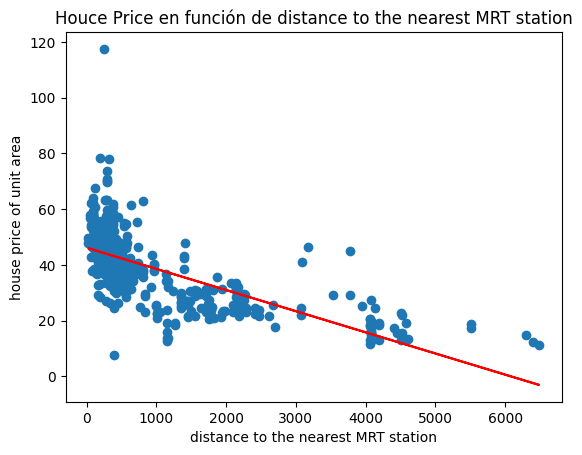

In [ ]:
plt.scatter(X,y)
plt.plot(X,predicted_data,color="red")
plt.title('Houce Price en función de distance to the nearest MRT station')
plt.xlabel('distance to the nearest MRT station')
plt.ylabel('house price of unit area')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

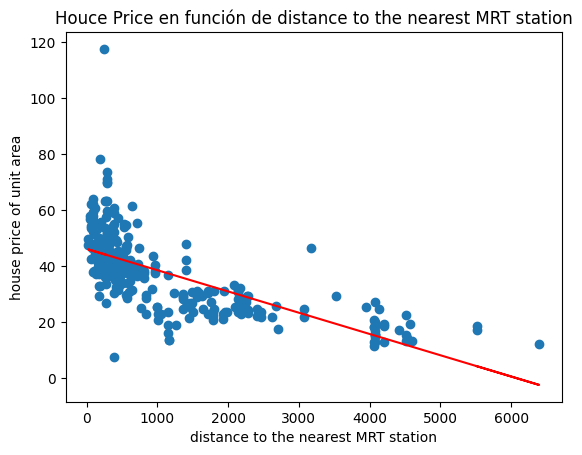

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,predicted_train,color="red")
plt.title('Houce Price en función de distance to the nearest MRT station')
plt.xlabel('distance to the nearest MRT station')
plt.ylabel('house price of unit area')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

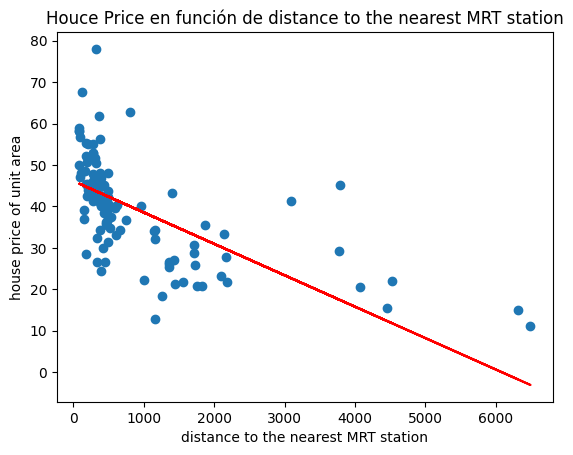

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,predicted_test,color="red")
plt.title('Houce Price en función de distance to the nearest MRT station')
plt.xlabel('distance to the nearest MRT station')
plt.ylabel('house price of unit area')
plt.show

Dataframe de actual y predecido

In [ ]:
A_P_data = pd.DataFrame({"actual":y,"predicted":predicted_data})

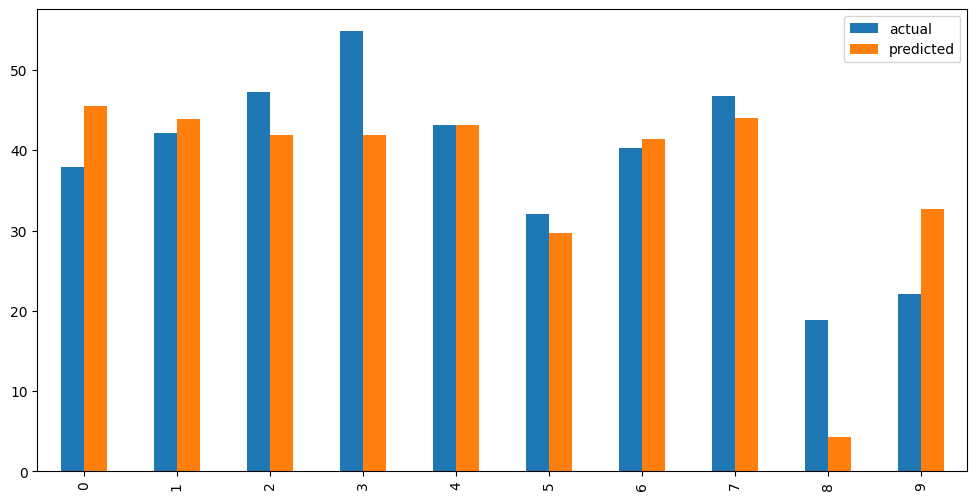

In [ ]:
A_P_data.head(10).plot(kind='bar',figsize=(12,6))
plt.show()

Error de predicción

In [ ]:
y_predict = reg.predict(X_test)

res = (y_predict - y_test)
RSS = (res*res).sum()

print("residual de suma de cuadrados: ",RSS)

residual de suma de cuadrados:  10905.525238182501
